# All Life Bank Customer Segmentation Project

## Background

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their Marketing Research Team, that the penetration in the market can be improved. Based on this input, the Marketing Team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the Bank poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help. 

## Objective

- To identify different segments in the existing customer base, based on their spending patterns, as well as past interaction with the bank using clustering algorithms
- How each cluster is different from the others?
- Provide recommendations to the bank on how to better market to and service these customers.

## Data Dictionary

**Sl_No**: Primary key of the records  
**Customer Key**: Customer identification number  
**Average Credit Limit**: Average credit limit of each customer for all credit cards  
**Total credit cards**: Total number of credit cards possessed by the customer  
**Total visits bank**: Total number of visits that customer made (yearly) personally to the bank  
**Total visits online**: Total number of visits or online logins made by the customer (yearly)  
**Total calls made**: Total number of calls made by the customer to the bank or its customer service department (yearly)

## Analysis and Prediction

### Warnings

In [1]:
import warnings # importing warnings
warnings.filterwarnings('ignore') # ensuring warnings do not appear in the notebook

### Import relevant libraries

In [2]:
import numpy as np # numerical computations
import pandas as pd # data processing

# for creating visualisations
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# # to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans

### Load the data

In [3]:
data = pd.read_csv('Credit+Card+Customer+Data.csv') # loading the data
df = data.copy() # making a copy of the data to preserve the integrity of the original one
df.head() # showing the first 5 rows of the data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### Exploratory Data Analysis

In [4]:
# checking thedimension of the data
df.shape

(660, 7)

- There are 660 rows and 7 columns in the dataset.  

- The SI_No and Customer Key columns are not relevant to this analysis and so would be dropped 

In [5]:
# dropping the "SI_No" and "Customer Key" column
df.drop(['Sl_No', 'Customer Key'], axis=1, inplace=True)

In [6]:
# quality check
df.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [7]:
# checking for null values
df.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

- There are no null values in the dataset

In [8]:
# checking for duplicated values
df.duplicated().sum()

11

- There are 11 diplicated values in the dataset

In [9]:
# dropping the duplicated values and resetting the index
df.drop_duplicates(inplace=True) # dropping the duplicates
df.reset_index(drop=True, inplace=True) # resetting the index

In [10]:
# quality check
df.shape

(649, 5)

- There are now 649 rows and 5 columns in the dataset

In [11]:
# summary information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     649 non-null    int64
 1   Total_Credit_Cards   649 non-null    int64
 2   Total_visits_bank    649 non-null    int64
 3   Total_visits_online  649 non-null    int64
 4   Total_calls_made     649 non-null    int64
dtypes: int64(5)
memory usage: 25.5 KB


- All the columns are numerical (integer data type)

In [12]:
# statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,649.0,34878.274268,37813.736638,3000.0,11000.0,18000.0,49000.0,200000.0
Total_Credit_Cards,649.0,4.708783,2.173763,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,649.0,2.397535,1.625148,0.0,1.0,2.0,4.0,5.0
Total_visits_online,649.0,2.624037,2.952888,0.0,1.0,2.0,4.0,15.0
Total_calls_made,649.0,3.590139,2.877911,0.0,1.0,3.0,5.0,10.0


- The average credit card limit for most customers is between 11,000 - 49,000 dollars, the average is 34,878 and the maximum is 200,000
- The total credit cards for most customers is between 3 - 6 cards
- The total physical visits to the bank for most customers is between 1 - 4 times yearly
- The total online logins for most customers is between 1 - 4 times yearly
- The total calls made to the bank for most customers is between 1 - 5 times yearly.

### Univariate Analysis

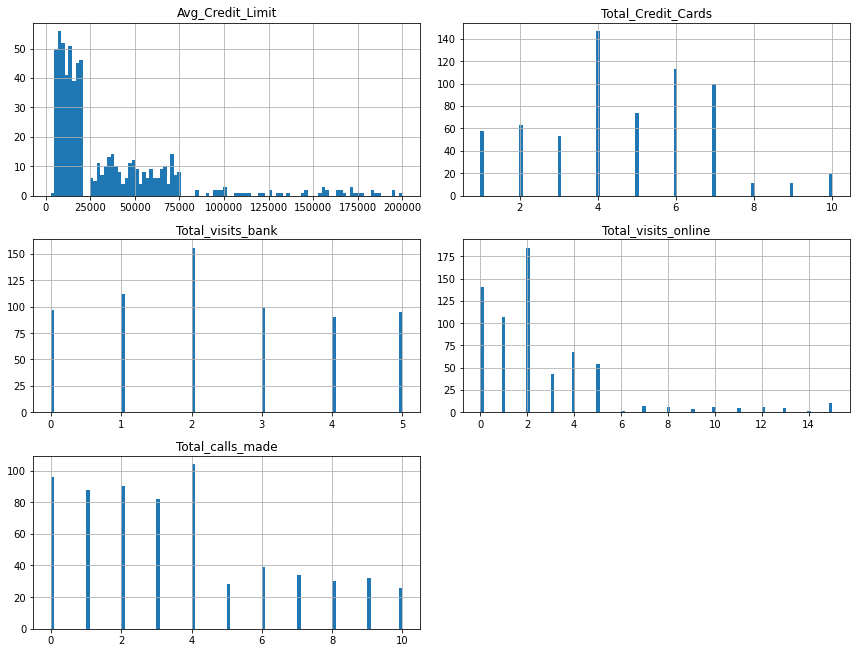

In [13]:
# plotting histograms of all the columns
df.hist(stacked = False, bins = 100, figsize = (12, 30), layout = (10, 2))
plt.tight_layout();

- The average credit card limit is right skewed. Most people have a limit of between 3,000 - 75,000 dollars
- All other variables in the dataset are discrete

### Bivariate analysis

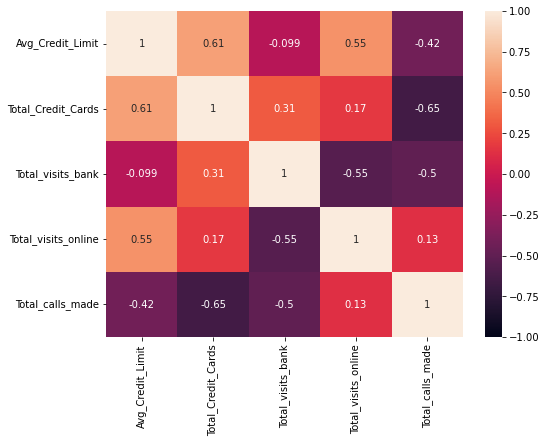

In [14]:
# plotting a heat map to show correlation between the variables
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), vmax=1, vmin=-1, annot=True)
plt.show()

- Total Credit Cards has a moderate correlation to Avg Credit Limit. It signifies that to an extent, the more credit cards a customer has, the higher their credit limit. This could be as a result of cummulative credit limits on each card.
- Total Visits Online has a moderate correlation with Avg Credit Limit. It signifies that to an extent, the higher a customer's spending limit, the more likely they are to use the online customer service channel
- Total Credit Cards has a moderate negative correlation with Total Calls made. This shows that to an extent, the more credit cards a customer has, the less calls they make to the bank.
- Total Visits Bank has a moderate negative correlation to Total Visits Online and Total Calls Made. This means that to an extent, the more customers use the online customer service platform and make calls to the bank, the less likely they are to visit the bank physically.

### Scaling the data

In [15]:
# normalizing the data
X = df.copy() # getting the data for X

scaler = StandardScaler() # creating an instance of the scaler

X_sc = scaler.fit_transform(X) # scaling the data

In [16]:
# checking the scaled data
X_sc

array([[ 1.72349946, -1.24708705, -0.86060646, -0.55040688, -1.24844298],
       [ 0.40020878, -0.78670054, -1.47640975,  2.49980809,  1.88123746],
       [ 0.40020878,  1.05484553, -0.86060646,  0.12741867,  0.14252611],
       ...,
       [ 2.91446107,  1.51523205, -0.86060646,  2.16089532, -0.9007007 ],
       [ 3.62903804,  2.43600508, -0.86060646,  4.19437197, -1.24844298],
       [ 3.49670897,  1.97561857, -1.47640975,  3.17763364, -0.55295843]])

### K-Means Clustering

In [17]:
# declaring the SSE variable (Sum of Squared Errors) as a list to hold the values of the inertia
SSE = []

# for loop to calculate the inertia over a range of values from 1 - 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i) # declaring an instance of the KMeans and setting the number of clusters to i
    kmeans.fit(X_sc) # fitting the KMeans to the data
    SSE.append(kmeans.inertia_) # appending the inertia results to the SSE list

In [18]:
# checking the values for SSE
SSE

[3245.0,
 2006.6299750332655,
 912.8580768587269,
 763.7267173524408,
 689.0840403626082,
 628.2792865576624,
 587.655971451262,
 551.1217020617564,
 527.8363904317908,
 503.6508788873166]

In [19]:
# creating a dataframe with number of clusters and the inertia values (SSE)
frame = pd.DataFrame({"Clusters": range(1, 11), "SSE": SSE})

frame

,Clusters,SSE
0,1,3245.000000
1,2,2006.629975
2,3,912.858077
3,4,763.726717
4,5,689.084040
5,6,628.279287
6,7,587.655971
7,8,551.121702
8,9,527.836390
9,10,503.650879


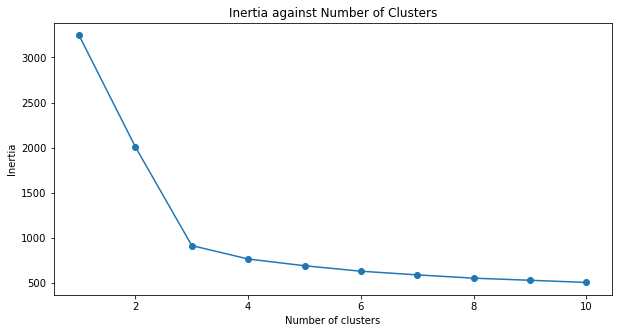

In [20]:
# visualising the inertia values
plt.figure(figsize = (10, 5))
plt.plot(frame["Clusters"], frame['SSE'], marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Inertia against Number of Clusters")
plt.show()

- From the elbow curve above, the Sum of Squared Errors (SSE) start to decrease significantly from 3 clusters.
- I will use 3 clusters to rebuild the K-Means model and then make a prediction

In [21]:
# declaring an instance of the KMeans  with n_clusters=3
kmeans2 = KMeans(n_clusters=3, random_state=0)
clusters = kmeans2.fit_predict(X_sc) # computing the clusters 

In [22]:
# showing the clusters
clusters

array([1, 2, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

To interprete the data with the cluster values, we need to insert the clusters into the dataset

In [23]:
# inserting the cluster values to the dataset to enable interpretation
X['kmeans_cluster'] = clusters
X.head() # getting the first 5 values of the updated dataset

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,kmeans_cluster
0,100000,2,1,1,0,1
1,50000,3,0,10,9,2
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,0


In [24]:
# converting the columns to a list
cols = X.columns.tolist()
cols

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made',
 'kmeans_cluster']

In [25]:
# removing the kmeans_cluster column
cols.remove('kmeans_cluster')
cols

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

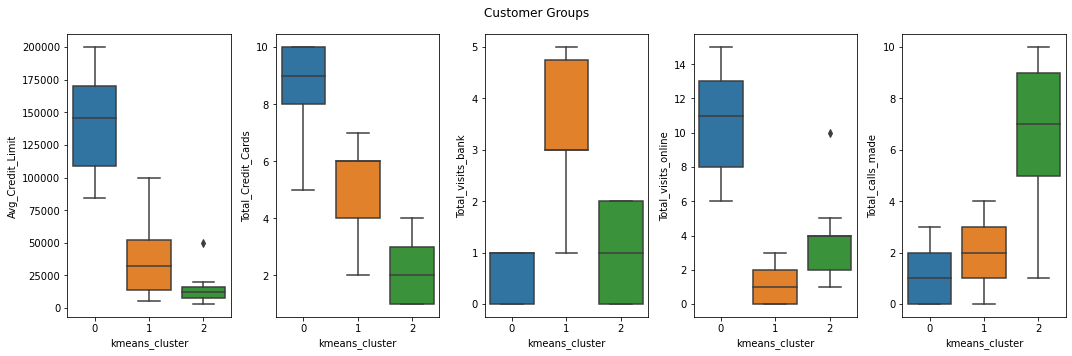

In [26]:
# examining the customer groups
fig, ax = plt.subplots(1, 5, figsize = (15, 5)) # subplot of 1 row and 5 columns
fig.suptitle("Customer Groups")

for i in range(len(cols)):
    # plotting boxplot for all the columns against the kmeans
    sns.boxplot(ax = ax[i], x = X['kmeans_cluster'], y = X[cols[i]]) 
    
fig.tight_layout()

From the boxplots above, the data can be summarised as follows:
- Cluster 0 contains:
  - Customers with higer credit limits from 85,000 dollars and above
  - Customers who own between 5 - 10 credit cards
  - Customers who do not visit the bank physically or visit once a year
  - Customers who use the online customer service platform 6 or more times yearly
  - Customers who make an average of 1 call or a maximum of 2 calls yearly to the bank.
  
This group shows a more tech savvy group of customers who probably earn more, and are the most comfortable using digital channels (credit cards) and online customer service platform to make complaints.  

- Cluster 1 contains:
  - Customers with credit limits from 3,000 - 100,000 dollars
  - Customers who own between 2 - 7 credit cards
  - Customers who visit the bank physically between 1 - 5 times yearly
  - Customers who use the online customer service platform between 0 - 3 times yearly
  - Customers who make a maximum of 4 calls or an average of 2 calls yearly to the bank.  
  
 This group of customers are not as tech savvy as the first group of customers, they probably do not earn as much as the first group and would rather visit the bank physically to lay complaints than use any other customer service channel.  
 
 Also, based on this group's most preferred customer service channel, they are customers who live or work close to the bank.

- Cluster 2 contains:
  - Customers with credit limits from 3,000 - 20,000 dollars
  - Customers who own between 1 - 4 credit cards
  - Customers who visit the bank physically between 0 - 2 times yearly
  - Customers who use the online customer service platform between 1 - 5 times yearly
  - Customers who make a maximum of 10 calls or an average of 7 calls yearly to the bank.  
  
This group of customers probably earn the least out of the other customer groups.  
Based on this group's most preferred customer service channel which is phone calls, they probably live or work further away from the bank and therefore are less likely to visit physically.  

Outliers can be seen in the third group where credit card limit is 5,000 dollars, and online visits is 10

### Calculating the silhouette score

In [27]:
# importing the silhouette score
from sklearn.metrics import silhouette_score

In [28]:
# computing the silhouette score
kmeans_sil = silhouette_score(X_sc, clusters)
kmeans_sil

0.516281010855363

The silhouette score is 0.52. This indicates a moderately good clustering result with data points that are relatively well-clustered and are moderately similar to their own cluster compared to other clusters.  

The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, with a score of 1 indicating that the object is very similar to its own cluster and very different from other clusters. A score of 0 indicates that the object is on the boundary between two clusters, and negative scores indicate that the object is more similar to other clusters than its own.

#### Varying the number of clusters to try for an improved silhouette score

In [29]:
# creating a for loop with varying number of clusters from 2 - 10
sil_score = [] # creating an empty list to store the silhouette scores
cluster_nums = [i for i in range(2, 11)] # creating a list of clusters from 2 - 10

for i in cluster_nums:
    kmeans = KMeans(n_clusters=i, random_state=0) # declaring an instance of the K-means algorithm
    clusters = kmeans.fit_predict(X_sc) # computing the clusters
    kmeans_sil = silhouette_score(X_sc, clusters) # computing the silhouette score
    sil_score.append(kmeans_sil) # appending the scores to the sil_score list
    sil_score_dict = {i: round((j), 2) for i,j in zip(cluster_nums, sil_score)}
    
sil_score_dict

{2: 0.42,
 3: 0.52,
 4: 0.36,
 5: 0.27,
 6: 0.26,
 7: 0.25,
 8: 0.23,
 9: 0.22,
 10: 0.21}

Since the silhouette score calculates how good a clustering is, a higher score is desired. Therefore we can see that 3 clusters gives the best silhouette score which is 0.52

In [30]:
# creating a dataframe with number of clusters and the silhouette scores
sil_frame = pd.DataFrame({"Clusters": cluster_nums, "Silhouette_Scores": sil_score})
sil_frame

,Clusters,Silhouette_Scores
0,2,0.418000
1,3,0.516281
2,4,0.357024
3,5,0.273091
4,6,0.256523
5,7,0.248292
6,8,0.226741
7,9,0.217544
8,10,0.210923


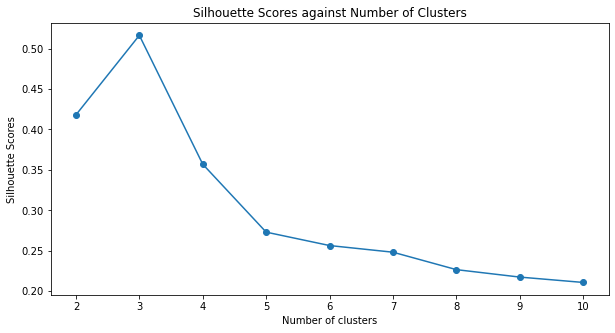

In [36]:
# visualising the silhouette scores
plt.figure(figsize = (10, 5))
plt.plot(sil_frame["Clusters"], sil_frame['Silhouette_Scores'], marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores against Number of Clusters")
plt.show()

- From the graph above, the cluster with the maximum silhouette score is 3.  
- This is similar to the result obtained from computing the inertia which we already used to build our model.

### DBSCAN

In [37]:
# import the algorithm
from sklearn.cluster import DBSCAN

In [38]:
# create an instance 
dbscan = DBSCAN()

# make a prediction
db_labels = dbscan.fit_predict(X_sc)
db_labels

array([-1, -1, -1, -1, -1,  2, -1, -1, -1, -1,  2,  2,  0,  3,  1,  2, -1,
        2,  1,  3,  1,  2,  3,  3,  2,  3,  2, -1,  2,  2,  3,  3, -1,  2,
        3,  2, -1,  2,  3,  1,  7,  6,  1,  2,  1,  3,  4,  1, -1,  1,  2,
        3,  3,  2,  2,  4, -1,  2,  2,  3,  3, -1, -1,  2,  2,  3,  2,  1,
        0,  0,  0,  1,  3,  3,  2,  3,  0,  3,  2,  6,  1,  3,  3,  3,  1,
        3,  3, -1,  3,  7,  3, -1,  3,  0, -1,  0,  1,  2,  3,  3,  2,  3,
        3,  2, -1,  3,  3,  1,  1, -1,  1,  2,  3, -1,  2,  1,  2,  2,  3,
        2,  1,  2,  5,  3,  1,  3,  3, -1,  3,  3,  3, -1, -1,  3,  3,  1,
        2,  2,  3,  2,  2,  2,  3,  3,  7,  2,  3,  1, -1,  6, -1,  3,  1,
        2,  7,  3, -1,  0, -1,  4,  2,  1,  2,  2,  2,  2,  1,  3,  3,  6,
        1,  2,  3, -1,  1,  2,  3,  5,  2,  2,  2,  0, -1,  2,  1,  1,  2,
        1,  2,  3,  2,  1,  2,  3,  2,  6,  3,  7,  2,  2,  2,  2, -1, -1,
       -1,  1,  2,  2,  3,  3,  3,  2,  3,  3, -1,  3,  3,  2,  1,  3,  1,
        3, -1,  0,  1,  8

In [39]:
eps_list = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] # values for eps
sil_score = []

# running a loop through values of eps
for i in eps_list:
    dbscan = DBSCAN(eps = i) # declaring an instance
    db_labels = dbscan.fit_predict(X_sc) # predicting clusters
    kmeans_sil = silhouette_score(X_sc, db_labels) # computing the silhouette score
    sil_score.append(kmeans_sil) # appending the scores to the sil_score list
    sil_score_dict = {i: round((j), 2) for i,j in zip(eps_list, sil_score)}
    
sil_score_dict

{0.4: -0.3, 0.5: -0.14, 0.6: -0.01, 0.7: 0.53, 0.8: 0.5, 0.9: 0.46, 1.0: 0.52}

In [40]:
sil_frame = pd.DataFrame({"Eps": eps_list, "Silhouette_Scores": sil_score})
sil_frame

,Eps,Silhouette_Scores
0,0.4,-0.304496
1,0.5,-0.141201
2,0.6,-0.007034
3,0.7,0.525369
4,0.8,0.497571
5,0.9,0.457985
6,1.0,0.519298


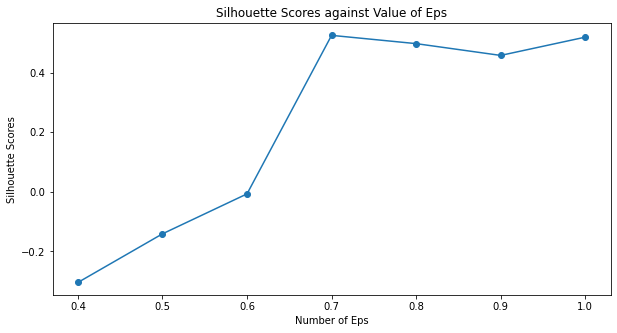

In [41]:
plt.figure(figsize = (10, 5))
plt.plot(sil_frame["Eps"], sil_frame['Silhouette_Scores'], marker = "o")
plt.xlabel("Number of Eps")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores against Value of Eps")
plt.show()

- Optimal value of eps is 0.7

In [42]:
# create an instance 
dbscan = DBSCAN(eps=0.7)

# make a prediction
db_labels = dbscan.fit_predict(X_sc)
db_labels

array([-1, -1, -1, -1, -1,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [43]:
# inserting the db_labels to the dataset to enable interpretation
X['db_labels'] = db_labels
X.head() # getting the first 5 values of the updated dataset

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,kmeans_cluster,db_labels
0,100000,2,1,1,0,1,-1
1,50000,3,0,10,9,2,-1
2,50000,7,1,3,4,1,-1
3,30000,5,1,1,4,1,-1
4,100000,6,0,12,3,0,-1


In [44]:
# converting the columns to a list
cols2 = X.columns.tolist()
cols2

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made',
 'kmeans_cluster',
 'db_labels']

In [45]:
# removing the kmeans_cluster and the db_labels column
cols2.remove('kmeans_cluster')
cols2.remove('db_labels')
cols2

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

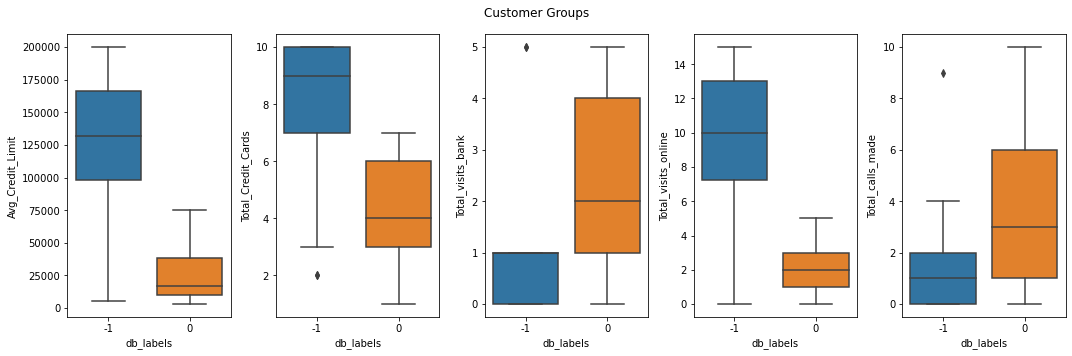

In [46]:
# examining the customer groups
fig, ax = plt.subplots(1, 5, figsize = (15, 5)) # subplot of 1 row and 5 columns
fig.suptitle("Customer Groups")

for i in range(len(cols)):
    # plotting boxplot for all the columns against the kmeans
    sns.boxplot(ax = ax[i], x = X['db_labels'], y = X[cols[i]]) 
    
fig.tight_layout()

From the boxplots above, the data can be summarised as follows:
- Cluster -1 contains:
  - Customers with higer credit limits mostly between 100,000 - 160,000 dollars and above
  - Customers who own mostly between 7 - 10 credit cards
  - Customers who do not visit the bank physically or visit once a year
  - Customers who use the online customer service platform mostly from 7 or more times yearly
  - Customers who make mostly between 1 - 2 calls yearly to the bank.
  
This group shows a more tech savvy group of customers who probably earn more, and are the most comfortable using digital channels (credit cards) and online customer service platform to make complaints.  

- In the first cluster, outliers can be seen where customers have only two credit cards, customers visit the bank 5 times yearly and customers make up to 9 calls a year.

- Cluster 0 contains:
  - Customers with credit limits from 3,000 - 75,000 dollars
  - Customers who own between 1 - 7 credit cards
  - Customers who visit the bank physically mostly between 1 - 4 times yearly
  - Customers who use the online customer service platform mostly between 1 - 3 times yearly
  - Customers who make a mostly between 1 - 6 calls yearly to the bank.  
  
This group of customers are not as tech savvy as the first group of customers, they probably do not earn as much as the first group and would rather visit the bank physically to lay complaints than use any other customer service channel.  
 
Also, based on this group's most preferred customer service channel, they are customers who live or work close to the bank. They also favour calls to the bank.

### K-Means vs DBSCAN

K-Means grouped the customers into 3 clusters. From the clusters, customers were grouped distinctly into higher-range earners, middle-range earners and lower-range earners with labels 0-2 for the clusters  

DBSCAN grouped customers into only 2 clusters. It was observed that the middle-range earners and the lower-range earners were combined into one group along with all the other features that made these two groups distinct in the K-Means clustering. Clusters were labelled -1 and 0

### Recommendation

- Customers with higher credit limits tend to require more credit cards. The marketing team could focus on selling the credit cards to this group of customers. Customers with the mid-range credit limits had the second highest uptake of credit cards and marketing efforts could be channeled generally to these groups of people to improve their uptake of the cards.

- Customers with higher credit limits prefer to use the online customer service portal, customers with mid-range credit limits prefer to visit the bank, while customers with lower credit limits prefer to call. The total number of customers who fall into these groups should be taken into consideration and efforts should be made to scale the different customer service chanels to meet their different numbers and needs.